In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# pulling San Diego weather data and avocado import data
San_df = pd.read_csv('San Diego (SAN) Weather Station Data.csv')
import_df = pd.read_csv('HAB_Arrival_Volume_All.csv')
# set the Date to standard time
San_df["Date"] = pd.to_datetime(San_df["Date"],errors='coerce')
# drop the row with nan
San_df = San_df.dropna(subset=['Date'])
San_df.head()

,Date,Precipitation,Max Temperature (Farenheit),Minimum Daily Temperature (Farenheit),Mean Daily Temperature,Growing Degree Days (50 Degree Base)
0,2000-01-01,0.03,59,51,55,5
1,2000-01-02,0,60,49,54.5,5
2,2000-01-03,0,67,45,56,6
3,2000-01-04,0,67,45,56,6
4,2000-01-05,0,64,45,54.5,5


In [3]:
# rename the "Week" in import dataframe to "Date"
import_df = import_df .rename(columns={"Week":"Date"})
# set the "Date" into standard time format
San_df["Date"] = pd.to_datetime(San_df[["Date"]].stack()).unstack()
import_df["Date"] = pd.to_datetime(import_df[["Date"]].stack()).unstack()

In [4]:
# pull out the california supply data
import_df = import_df[["Date","California"]]
# merge the weather data and import data in San Diego
combined_data = pd.merge(import_df, San_df, on="Date", how = "outer")
# delete the unuseful column

# set the index column with date
combined_data=combined_data.set_index("Date")

# remove non-numeric rows in precipitation column
combined_data=combined_data[pd.to_numeric(combined_data['Precipitation'], errors='coerce').notnull()]
# convert the str in precipitation column into float number
combined_data.Precipitation = combined_data.Precipitation.astype(float)

combined_data.head()


,California,Precipitation,Max Temperature (Farenheit),Minimum Daily Temperature (Farenheit),Mean Daily Temperature,Growing Degree Days (50 Degree Base)
Date,,,,,,
2014-01-05,6300.0,0.0,74,50,62,12
2014-01-12,24300.0,0.0,64,50,57,7
2014-01-19,862425.0,0.0,73,52,62.5,13
2014-01-26,1877475.0,0.0,68,55,61.5,12
2014-02-02,1971675.0,0.0,63,48,55.5,6


In [5]:
#creat "year" column
combined_data['year'] = None
for index, row in combined_data.iterrows():
    combined_data.at[index, 'year'] = str(index.year)
combined_data['year'] = pd.to_numeric(combined_data['year'])

#create 'month' column
combined_data['month'] = None
for index, row in combined_data.iterrows():
    combined_data.at[index, 'month'] = str(index.month)
combined_data['month'] = pd.to_numeric(combined_data['month'])
combined_data.head()

,California,Precipitation,Max Temperature (Farenheit),Minimum Daily Temperature (Farenheit),Mean Daily Temperature,Growing Degree Days (50 Degree Base),year,month
Date,,,,,,,,
2014-01-05,6300.0,0.0,74,50,62,12,2014,1
2014-01-12,24300.0,0.0,64,50,57,7,2014,1
2014-01-19,862425.0,0.0,73,52,62.5,13,2014,1
2014-01-26,1877475.0,0.0,68,55,61.5,12,2014,1
2014-02-02,1971675.0,0.0,63,48,55.5,6,2014,2


In [6]:
#establish list of years in the combined data
year = ['2014',
           '2015',
           '2016',
           '2017',
           '2018',
       '2019']
#generate a pivot table that calculates total supply amount by month
supply_table = pd.DataFrame(combined_data[(combined_data.year == 2014) | 
        (combined_data.year == 2015) |
        (combined_data.year == 2016) |
        (combined_data.year == 2017) |
        (combined_data.year == 2018)].pivot_table(
values = 'California',
    index = 'year',
    columns = 'month',
    aggfunc = np.sum
)).round(2)
# supply_table = (supply_table/(10**6)).round(2)
#generate a pivot table that calculates total precipitation by month
prep_table = pd.DataFrame(combined_data[(combined_data.year == 2014) | 
        (combined_data.year == 2015) |
        (combined_data.year == 2016) |
        (combined_data.year == 2017) |
        (combined_data.year == 2018)].pivot_table(
values = 'Precipitation',
    index = 'year',
    columns = 'month',
    aggfunc = np.sum
)).round(2)
supply_table

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,2770500.0,5379108.0,17335371.0,38318833.0,57067150.0,67074598.0,30253825.0,25621093.0,11194367.0,1245695.0,0.0,86865.0
2015,5126000.0,9063634.0,28278981.0,52335390.0,63861666.0,61399930.0,48263898.0,36713446.0,16103077.0,3353979.0,0.0,0.0
2016,0.0,0.0,11700000.0,63900000.0,31222000.0,60964141.0,70613577.0,47942292.0,26805445.0,8836874.0,83736.0,122865.0
2017,3558300.0,4875000.0,16044100.0,29940700.0,42725600.0,42781500.0,25407300.0,10972000.0,3157900.0,43900.0,0.0,0.0
2018,4216600.0,12468400.0,19109400.0,63157200.0,72587500.0,65650700.0,46587400.0,29967500.0,8529800.0,235500.0,0.0,0.0


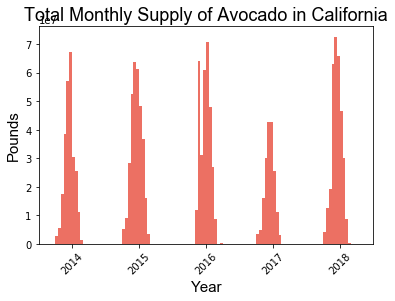

<Figure size 345.6x460.8 with 0 Axes>

In [7]:
# plot the graph describes the avocado supply trend in California from 2014 to 2018
supply_table.plot(kind = 'bar', legend = None, color = '#EC7063')
plt.title('Total Monthly Supply of Avocado in California', fontname = 'Arial', fontsize = 18)
plt.ylabel('Pounds', fontname = 'Arial', fontsize = 15)
plt.xlabel('Year', fontname = 'Arial', fontsize = 15)
plt.xticks(rotation = 45)
plt.figure(figsize = [4.8,6.4])


# plt.savefig('Total Monthly Supply of Avocado in California.png', orientation = 'portrait', dpi = 1800, bbox_inches = 'tight')
plt.show()


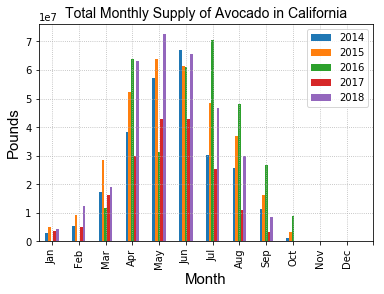

In [8]:
# plot the graph describes the avocado supply trend in California from 2014 to 2018 in each month (bar graph)
supply_table.T.plot(kind = 'bar')
plt.title('Total Monthly Supply of Avocado in California', fontname = 'Arial', fontsize = 14)
plt.xticks(np.arange(13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.xlim(0.5,12.5)
# plt.ylim(0.75,1.6)
plt.ylabel('Pounds',fontname = 'Arial', fontsize = 15)
plt.xlabel('Month', fontname = 'Arial', fontsize = 15)
plt.grid(linestyle =':')
plt.legend(loc = 0)
plt.savefig('Total Monthly Supply of Avocado in California.png', orientation = 'landscape', dpi = 1800)
plt.show()

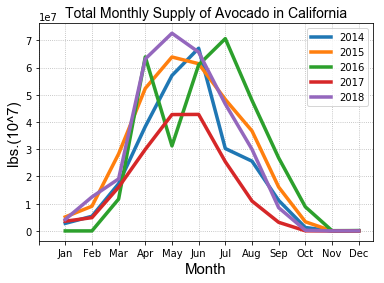

In [9]:
# plot the graph describes the avocado supply trend in California from 2014 to 2018 (line graph)
supply_table.T.plot(linewidth = 3.5)
plt.title('Total Monthly Supply of Avocado in California', fontname = 'Arial', fontsize = 14)
plt.xticks(np.arange(13),[' ','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('lbs.(10^7)',fontname = 'Arial', fontsize = 15)
plt.xlabel('Month', fontname = 'Arial', fontsize = 15)
plt.grid(linestyle =':')
plt.legend(loc = 0)
plt.savefig('Total Monthly Supply of Avocado in California.png', orientation = 'landscape', dpi = 1800)
plt.show()

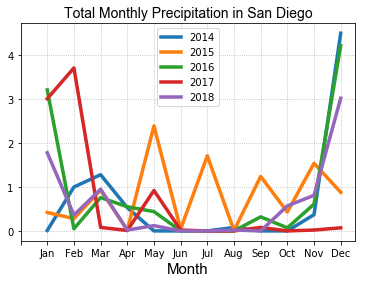

In [10]:
# plot the graph describes the total monthly precipitation in San Diego from 2014 to 2018 in each month(line graph)
prep_table.T.plot(linewidth = 3.5)
plt.title('Total Monthly Precipitation in San Diego', fontname = 'Arial', fontsize = 14)
plt.xticks(np.arange(13),[' ','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.ylabel('', fontname = 'Arial', fontsize = 15)
plt.xlabel('Month', fontname = 'Arial', fontsize = 15)
plt.grid(linestyle =':')
plt.legend(loc = 0)


plt.savefig('Total Monthly Precipitation in San Diego.png', orientation = 'portrait', dpi = 1800, bbox_inches = 'tight')
plt.show()

In [11]:
df = combined_data.groupby('year').sum()
df

,California,Precipitation,month
year,,,
2000,0.0,6.90,2184
2001,0.0,8.47,2226
2002,0.0,4.23,2231
2003,0.0,9.18,2156
2004,0.0,13.29,2322
2005,0.0,14.11,2232
2006,0.0,6.15,2219
2007,0.0,4.37,2260
2008,0.0,11.11,2276


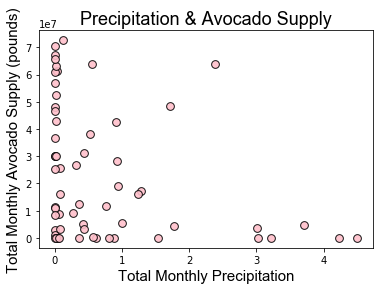

In [13]:
plt.scatter(y=supply_table,x=prep_table, color = 'pink', alpha = 0.9, edgecolors = 'black', s = 60)
plt.title('Precipitation & Avocado Supply', fontname = 'Arial', fontsize = 18)
plt.ylabel('Total Monthly Avocado Supply (pounds)', fontname = 'Arial', fontsize = 15)
plt.xlabel('Total Monthly Precipitation', fontname = 'Arial', fontsize = 15)

plt.show()


In [14]:
combined_data = combined_data.rename(columns={"Mean Daily Temperature":"Temp"})
# remove non-numeric rows in Temp column
combined_data=combined_data[pd.to_numeric(combined_data['Temp'], errors='coerce').notnull()]
# convert the str in Temp column into float number
combined_data.Temp = combined_data.Temp.astype(float)


In [15]:

temp_table = pd.DataFrame(combined_data[(combined_data.year == 2014) | 
        (combined_data.year == 2015) |
        (combined_data.year == 2016) |
        (combined_data.year == 2017) |
        (combined_data.year == 2018)].pivot_table(
values = 'Temp',
    index = 'year',
    columns = 'month',
    aggfunc = np.mean
)).round(2)
temp_table

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,61.37,61.27,64.04,65.47,69.84,68.38,73.66,73.80,75.34,71.66,65.62,60.35
2015,60.57,63.17,66.56,65.98,64.06,69.12,72.66,75.11,76.96,74.47,63.17,58.00
2016,58.78,64.19,62.71,65.86,64.90,69.27,70.88,72.81,72.03,70.71,65.83,58.78
2017,58.02,59.70,62.73,65.21,65.37,68.13,72.95,73.18,72.95,71.55,64.87,60.27
2018,61.57,59.93,60.52,63.60,63.65,67.70,75.40,78.13,71.84,69.16,65.71,59.65


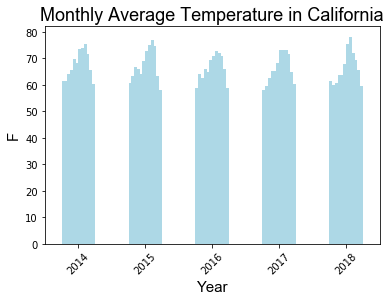

<Figure size 345.6x460.8 with 0 Axes>

In [16]:
temp_table.plot(kind = 'bar', legend = None, color = 'lightblue')
plt.title('Monthly Average Temperature in California', fontname = 'Arial', fontsize = 18)
plt.ylabel('F', fontname = 'Arial', fontsize = 15)
plt.xlabel('Year', fontname = 'Arial', fontsize = 15)
plt.xticks(rotation = 45)
plt.figure(figsize = [4.8,6.4])

# plt.savefig('type_share_by_region.png', orientation = 'portrait', dpi = 1800, bbox_inches = 'tight')
plt.show()

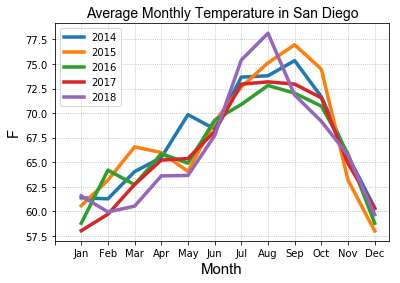

In [17]:
temp_table.T.plot(linewidth = 3.5)
plt.title('Average Monthly Temperature in San Diego', fontname = 'Arial', fontsize = 14)
plt.xticks(np.arange(13),['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.xlim(0.5,12.5)
# plt.ylim(0.75,1.6)
plt.ylabel('F',fontname = 'Arial', fontsize = 15)
plt.xlabel('Month', fontname = 'Arial', fontsize = 15)
plt.grid(linestyle =':')
plt.legend(loc = 0)
plt.savefig('Average Monthly Temperature in California.png', orientation = 'landscape', dpi = 1800)
plt.show()

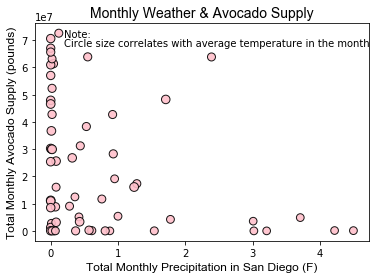

In [36]:
plt.scatter(y=supply_table,x=prep_table, color = 'pink', alpha = 0.9, edgecolors = 'black', s = temp_table)
plt.title('Monthly Weather & Avocado Supply', fontname = 'Arial', fontsize = 14)
plt.ylabel('Total Monthly Avocado Supply (pounds)', fontname = 'Arial', fontsize = 12)
plt.xlabel('Total Monthly Precipitation in San Diego (F)', fontname = 'Arial', fontsize = 12)

#Incorporate a text label regarding circle size
plt.text(0.2,71000000,"Note:")
plt.text(0.2,68000000,"Circle size correlates with average temperature in the month" )

plt.show()

Text(80,6.5e+07,'Circle size correlates with total precipitation in the month')

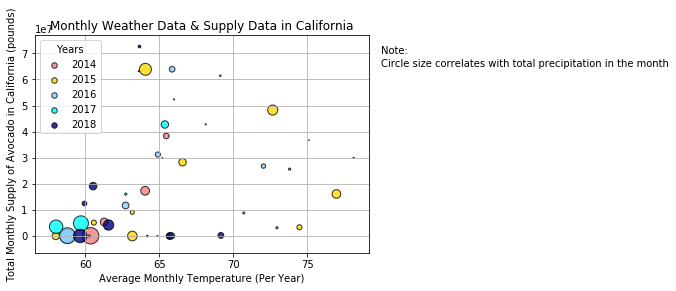

In [29]:
# Obtain the x and y coordinates for the year of 2014
## Retrieve the data with the year 2014
data_2014 = combined_data.loc[combined_data["year"] == 2014,:]
total_monthly_precipitation_2014 = data_2014.groupby('month')['Precipitation'].sum()
total_monthly_supply_2014 = data_2014.groupby('month')["California"].sum()
average_monthly_temp_2014 = data_2014.groupby('month')["Temp"].mean()

# Obtain the x and y coordinates for the year of 2015
## Retrieve the data with the year 2015
data_2015 = combined_data.loc[combined_data["year"] == 2015,:]
total_monthly_precipitation_2015 = data_2015.groupby('month')['Precipitation'].sum()
total_monthly_supply_2015 = data_2015.groupby('month')["California"].sum()
average_monthly_temp_2015 = data_2015.groupby('month')["Temp"].mean()

# Obtain the x and y coordinates for the year of 2016
## Retrieve the data with the year 2016
data_2016 = combined_data.loc[combined_data["year"] == 2016,:]
total_monthly_precipitation_2016 = data_2016.groupby('month')['Precipitation'].sum()
total_monthly_supply_2016 = data_2016.groupby('month')["California"].sum()
average_monthly_temp_2016 = data_2016.groupby('month')["Temp"].mean()

# Obtain the x and y coordinates for the year of 2017
## Retrieve the data with the year 2017
data_2017 = combined_data.loc[combined_data["year"] == 2017,:]
total_monthly_precipitation_2017 = data_2017.groupby('month')['Precipitation'].sum()
total_monthly_supply_2017 = data_2017.groupby('month')["California"].sum()
average_monthly_temp_2017 = data_2017.groupby('month')["Temp"].mean()

# Obtain the x and y coordinates for the year of 2018
## Retrieve the data with the year 2018
data_2018 = combined_data.loc[combined_data["year"] == 2018,:]
total_monthly_precipitation_2018 = data_2018.groupby('month')['Precipitation'].sum()
total_monthly_supply_2018 = data_2018.groupby('month')["California"].sum()
average_monthly_temp_2018 = data_2018.groupby('month')["Temp"].mean()

# Build the scatter plots for each year
scatter2014 = plt.scatter(average_monthly_temp_2014, total_monthly_supply_2014, s=total_monthly_precipitation_2014*60,
            marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.8, label = "2014")
scatter2015 = plt.scatter(average_monthly_temp_2015, total_monthly_supply_2015, s=total_monthly_precipitation_2015*60,
            marker="o", facecolors="gold", edgecolors="black", alpha=0.8, label = "2015")
scatter2016 = plt.scatter(average_monthly_temp_2016, total_monthly_supply_2016, s=total_monthly_precipitation_2016*60,
            marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.8, label = "2016")
scatter2017 = plt.scatter(average_monthly_temp_2017, total_monthly_supply_2017, s=total_monthly_precipitation_2017*60,
            marker="o", facecolors="cyan", edgecolors="black", alpha=0.8, label = "2017")
scatter2018 = plt.scatter(average_monthly_temp_2018, total_monthly_supply_2018, s=total_monthly_precipitation_2018*60,
            marker="o", facecolors="navy", edgecolors="black", alpha=0.8, label = "2018")

# Incorporate the other graph properties
plt.title("Monthly Weather Data & Supply Data in California")
plt.xlabel("Average Monthly Temperature (Per Year)")
plt.ylabel("Total Monthly Supply of Avocado in California (pounds)")
plt.grid(True)
# Create a legend
lgnd = plt.legend(loc="best",title = "Years")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(80,70000000,"Note:")
plt.text(80,65000000,"Circle size correlates with total precipitation in the month" )

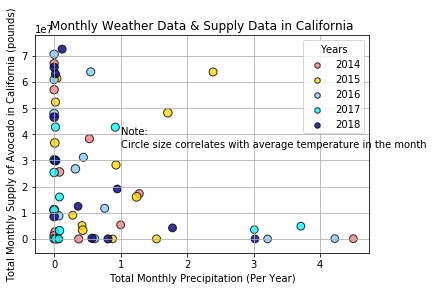

In [40]:
# Obtain the x and y coordinates for the year of 2014
## Retrieve the data with the year 2014
data_2014 = combined_data.loc[combined_data["year"] == 2014,:]
total_monthly_precipitation_2014 = data_2014.groupby('month')['Precipitation'].sum()
total_monthly_supply_2014 = data_2014.groupby('month')["California"].sum()
average_monthly_temp_2014 = data_2014.groupby('month')["Temp"].mean()

# Obtain the x and y coordinates for the year of 2015
## Retrieve the data with the year 2015
data_2015 = combined_data.loc[combined_data["year"] == 2015,:]
total_monthly_precipitation_2015 = data_2015.groupby('month')['Precipitation'].sum()
total_monthly_supply_2015 = data_2015.groupby('month')["California"].sum()
average_monthly_temp_2015 = data_2015.groupby('month')["Temp"].mean()

# Obtain the x and y coordinates for the year of 2016
## Retrieve the data with the year 2016
data_2016 = combined_data.loc[combined_data["year"] == 2016,:]
total_monthly_precipitation_2016 = data_2016.groupby('month')['Precipitation'].sum()
total_monthly_supply_2016 = data_2016.groupby('month')["California"].sum()
average_monthly_temp_2016 = data_2016.groupby('month')["Temp"].mean()

# Obtain the x and y coordinates for the year of 2017
## Retrieve the data with the year 2017
data_2017 = combined_data.loc[combined_data["year"] == 2017,:]
total_monthly_precipitation_2017 = data_2017.groupby('month')['Precipitation'].sum()
total_monthly_supply_2017 = data_2017.groupby('month')["California"].sum()
average_monthly_temp_2017 = data_2017.groupby('month')["Temp"].mean()

# Obtain the x and y coordinates for the year of 2018
## Retrieve the data with the year 2018
data_2018 = combined_data.loc[combined_data["year"] == 2018,:]
total_monthly_precipitation_2018 = data_2018.groupby('month')['Precipitation'].sum()
total_monthly_supply_2018 = data_2018.groupby('month')["California"].sum()
average_monthly_temp_2018 = data_2018.groupby('month')["Temp"].mean()

# Build the scatter plots for each year
scatter2014 = plt.scatter(total_monthly_precipitation_2014, total_monthly_supply_2014, s=average_monthly_temp_2014,
            marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.8, label = "2014")
scatter2015 = plt.scatter(total_monthly_precipitation_2015, total_monthly_supply_2015, s=average_monthly_temp_2015,
            marker="o", facecolors="gold", edgecolors="black", alpha=0.8, label = "2015")
scatter2016 = plt.scatter(total_monthly_precipitation_2016, total_monthly_supply_2016, s=average_monthly_temp_2016,
            marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.8, label = "2016")
scatter2017 = plt.scatter(total_monthly_precipitation_2017, total_monthly_supply_2017, s=average_monthly_temp_2017,
            marker="o", facecolors="cyan", edgecolors="black", alpha=0.8, label = "2017")
scatter2018 = plt.scatter(total_monthly_precipitation_2018, total_monthly_supply_2018, s=average_monthly_temp_2018,
            marker="o", facecolors="navy", edgecolors="black", alpha=0.8, label = "2018")

# Incorporate the other graph properties
plt.title("Monthly Weather Data & Supply Data in California")
plt.xlabel("Total Monthly Precipitation (Per Year)")
plt.ylabel("Total Monthly Supply of Avocado in California (pounds)")
plt.grid(True)
# Create a legend
lgnd = plt.legend(loc="best",title = "Years")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(1,40000000,"Note:")
plt.text(1,35000000,"Circle size correlates with average temperature in the month" )
plt.savefig('weather data in California.png', orientation = 'landscape', dpi = 1800)